## **Logistics Regression**

We saw that the linear regression algorithm can make an infinte number of predictions, based on the inputs. The logistic regression is a model that takes inputs and the output returns the probabilty for two disctinct cases. For example a spam filtering tool would determine if an email is spam or not. This algorithm is a categorization algorithm, it is used to check if the inputs then to a case or another, rather than predicting an evolution, like the linear regression. 

The idea behinde logistic regression is similar to linear regression. We have to define a function that represents our model and we need to find the parameters that minimize the cost function. Because this algorithm is a binary classification one, the output will calculate the probability for the 'True' case or for the 'False' case. Either way if we know one probability, the other one can be obtaine by using this formula: $$P(x=0) + P(x=1) = 1$$

Because we want to obtain the probability of a case we would like to define a function that is ranging between (0, 1). For that we can use the **sigmoid function**, known also as **logistic function**:
$$f(z) = \frac{1}{1+e^{-z}}$$
Here we can see that for a very negative value of z the function will decrease down to 0, and for a very large positive the function will get close to 1. Also, using the knowledge form the linear regression algorithm, z it is calculated as follows:
$$ z = \vec{w}\cdot\vec{x} + b$$ 
So the true form of the model would be:
$$ f(x) = \frac{1}{1+e^{-(\vec{w}\cdot\vec{x}+b)}} $$

Also a big difference between linear regression and logistic regression is that the cost function used for optimization differ. For logistic regression we use this cost function:
$$ J_{wb} = \frac{1}{m} \sum_{i=1}^{m} L(f(x),y), $$
$$ L(f(x),y) = -y\log(f(x)) -(1-y)\log(1-f(x))$$

This cost function is used because If we try to use the one from linear regression the cost will be a non-convex function. This means that the cost function has multiple local minima and with is not an ideal thing. For the function that we defined, this cost function will be a good fit because this one is a convex function (has only one minimum) and the gradient descent would work much more efficient. The partial derivatives of the cost function are computed as below:

$$\frac{dJ}{dw} = \frac{1}{m}\sum_{i=1}^{m}(f(x)-y)x$$
$$\frac{dJ}{db} = \frac{1}{m}\sum_{i=1}^{m}(f(x)-y)$$

We observe that the partial derivatives are computed the same as for the linear regression, and this is possible because of the new cost function that we defined. To determine the decision boundary of the two categories, we want to impose the following statement:
$$ f(x) = \frac{1}{1 + e^{-(\vec{w}\cdot\vec{x} +b)}} = 0.5 $$

The solution for this equation will be represented as the decision boundary.
In the following example we will see how to implement the algorithm and also how the decision is acctually taken.

## **Example of logistic regression**

Here is presented a small data set that depicts the number of hours studied during the night (first feature) and the hours studied during the day (second feature). We can categorize them by exam pass or exam failed, in order to see what combinations we should use in order to pass an exam.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1, 2],[2, 3],[3, 4],[2, 4],[1, 3],[3, 3],[2, 2],[4, 4],[5, 6],[4, 5],[6, 7],[5, 5],[4, 6],[6, 6],[3, 5]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

As discussed previously with the linear regression, in order to help the gradient descent algorithm we should scale the data to a range near (-1, 1).

In [6]:
def mean_normalization(X):
    m, n = X.shape
    X_scaled = np.zeros((m, n))
    for index in range(n):
        average = np.average(X[:,index])
        minimum = np.min(X[:,index])
        maximum = np.max(X[:,index])
        X_scaled[:,index] = (X[:,index]-average)/(maximum-minimum)
    return X_scaled

After using the **mean normalization** we plot the given data and also the normalized data. We can se that now the ranges are scaled to an interval close to (-1, 1). As an observation, we are not required always to do this normalization but it represents a good practice.

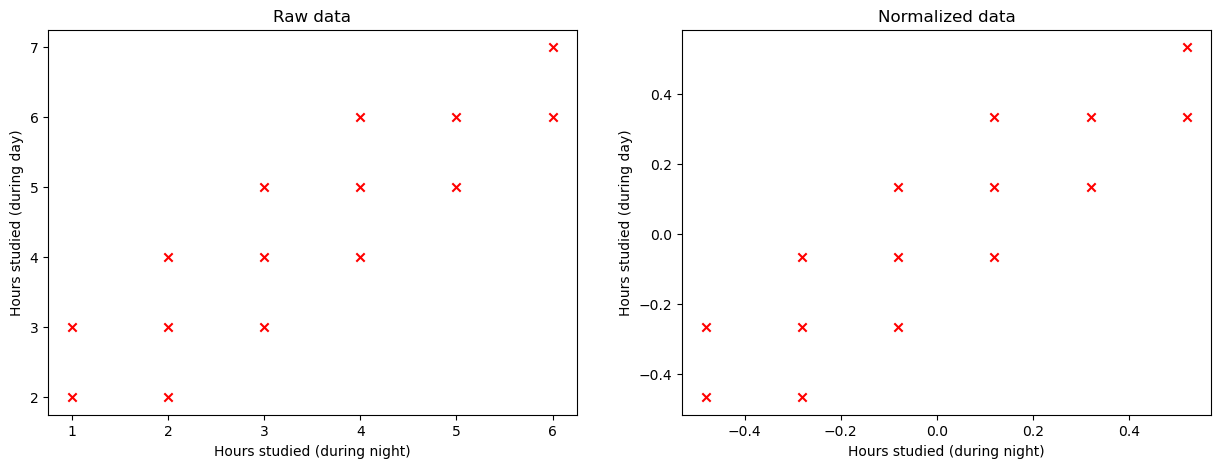

In [76]:
X_scaled = mean_normalization(X)

figs, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].scatter(X[:,0], X[:,1], color = "red", marker = "x")
axs[0].set_title("Raw data")
axs[0].set_xlabel("Hours studied (during night)")
axs[0].set_ylabel("Hours studied (during day)")

axs[1].scatter(X_scaled[:,0], X_scaled[:,1], color = "red", marker = "x")
axs[1].set_title("Normalized data")
axs[1].set_xlabel("Hours studied (during night)")
axs[1].set_ylabel("Hours studied (during day)")

plt.show()

Below is the implementation for all the needed functions. We also compute the loss to plot it evolution over time. Also we can see that a function that uses the model to make the categorizations. If the model outputs a probability bigger or equal to 0.5 then it is considered that the features assure the passing of the exam. Otherwise the features assure the failing the exam.

In [46]:
def sigmoid(X,w,b):
    f = 1/(1+np.exp(-np.dot(X,w) - b))
    return f

def compute_loss(X,w,b,y):
    f = sigmoid(X,w,b)
    L = -np.sum(y*np.log(f)-(1-y)*np.log(1-f))
    return L

def compute_partial_derivatives(X,w,b,y):
    f = sigmoid(X,w,b)
    m = y.size
    dJ_dw = 1/m*np.dot(X.T,f - y)
    dJ_db = 1/m*np.sum(f - y)
    return dJ_dw, dJ_db

def gradient_descent(X,y,w_init,b_init,alpha,iterations):
    history = []
    w = w_init
    b = b_init
    for iteration in range(iterations):
        L = compute_loss(X,w,b,y)
        history.append(L)
        dJ_dw, dJ_db = compute_partial_derivatives(X,w,b,y)
        w = w - alpha*dJ_dw
        b = b - alpha*dJ_db
    return w, b, history

def categorize(X,w,b):
    probabilities = sigmoid(X,w,b)
    results = np.rint(probabilities)
    return results

Here is presented how to use the model and how to obtain the points for the plotting part:

In [64]:
w, b, history = gradient_descent(X_scaled,y,[0, 0], 0, 0.3, 250)
results = categorize(X_scaled,w,b)
X_0 = X_scaled[results == 0]
X_1 = X_scaled[results == 1]

Below we see the results and the loss evolution over time.

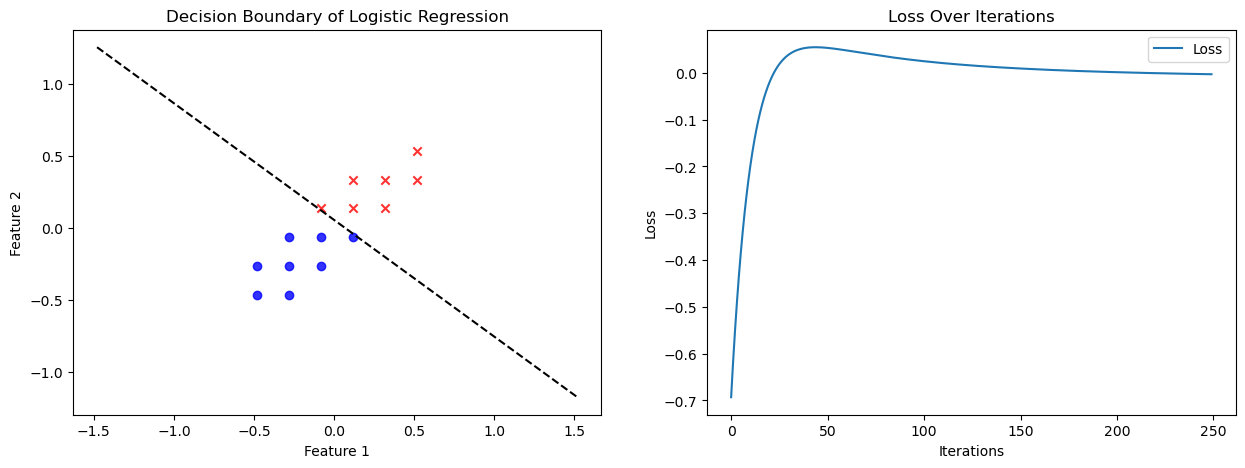

In [66]:
figs, axs = plt.subplots(1,2, figsize=(15,5))

axs[1].plot(range(len(history)), history, label="Loss")
axs[1].set_xlabel("Iterations")
axs[1].set_ylabel("Loss")
axs[1].set_title("Loss Over Iterations")
axs[1].legend()
    
axs[0].scatter(X_0[:, 0], X_0[:, 1], c="blue", marker="o", alpha =0.8)
axs[0].scatter(X_1[:, 0], X_1[:, 1], c="red", marker="x", alpha =0.8)

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
x_vals = np.linspace(x_min, x_max, 100)
y_vals = -(w[0] * x_vals + b) / w[1]

axs[0].plot(x_vals, y_vals, "k--", label="Decision Boundary")
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Feature 2")
axs[0].set_title("Decision Boundary of Logistic Regression")
plt.legend()

plt.show()

In principle we compute a decision boundary which can be a straight line, or a curved one (would require to use a polynomial regression form not the linear one). The decision is based on where the points are situated, so all the points from a side represent the same category. Also we have to note that this algorithm sorts the outcomes in two categories only (binary classification).

## **Overfitting in Logistic Regression**

As discussed in the polynomial regression case, the overfitting is a major problem because it can give extremly good results for a given training set, but because it fits the noise aswell, we cannot make valuable predictions. For this issue we can try reducing the number of the features, use more detailed and filtered measurements or use the regularized logistic regression method. 

This method uses the following cost function:
$$J_{wb} = -\frac{1}{m}\sum_{i=1}^{m}[y_ilog(f(x_i))+(1-y_i)log(1-f(x_i))] + \frac{\lambda}{2m}\sum_{j=1}^{n}w_j^2$$

The update formulas that are used are the ones from below:
$$ w_j = (1 - \alpha\frac{\lambda}{m})w_j - \frac{\alpha}{m}\sum_{i=1}^{m}(f(x_i)-y_i)x_i$$
$$ b = b - \frac{\alpha}{m}\sum_{i=1}^{m}(f(x_i)-y_i) $$